**STEP 1 (Today): Problem Understanding + Data Loading**

1️⃣ Business Problem Statement

Goal: Predict whether a customer will churn so the company can take preventive action.

Why it matters

Churn reduction = revenue protection

False negatives are costly (losing customers)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#The df.info() method provides a concise summary of a dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#The Python pandas function DataFrame. describe() is used to generate a statistical summary of the numerical columns in a DataFrame

df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#The function dataframe. isnull(). sum(). sum() returns the number of missing values in the dataset.

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**interview question from above code **
1) What is the target variable?

Target variable: The target variable is Churn. This is indicated by its name and the typical use case for this dataset (predicting customer churn).

2) Is it classification or regression?

Classification or regression? This is a classification problem. The Churn variable contains 'Yes' or 'No' values, which are discrete categories.

3) Are there categorical features?

Categorical features: Yes, there are many categorical features in the dataset. Columns with object dtype such as gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, and Churn itself are categorical.

4) Any missing values?

Missing values? No, there are no missing values in the dataset, as confirmed by df.isnull().sum(), which shows 0 for all columns.



In [7]:
df['Churn'].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

from the above code we find Class imbalance

Which metric to prioritize (Recall vs Precision)

**Interview Tip**

1) How do you start a data science project?

ANS) First, I clearly understand the business problem, identify the target variable, analyze class imbalance, and explore data quality before modeling.

** STEP 2 Exploratory Data Analysis (EDA) + Feature Understanding**

🎯 Goal of this step

Discover patterns related to churn

Identify useful features

Decide what preprocessing is needed

Build business intuition (this is interview gold)

In [8]:
#Separate Numerical & Categorical Features

# Target
target = "Churn"

# Categorical features
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols.remove(target)

# Numerical features
num_cols = df.select_dtypes(exclude=["object"]).columns.tolist()

cat_cols, num_cols


(['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges'])

**interview question**

Which customer behaviors are associated with churn?

### Analyzing Churn by Categorical Features

Let's visualize the distribution of churn for each categorical feature. This will help us identify which specific behaviors or service types are more prone to customer churn.

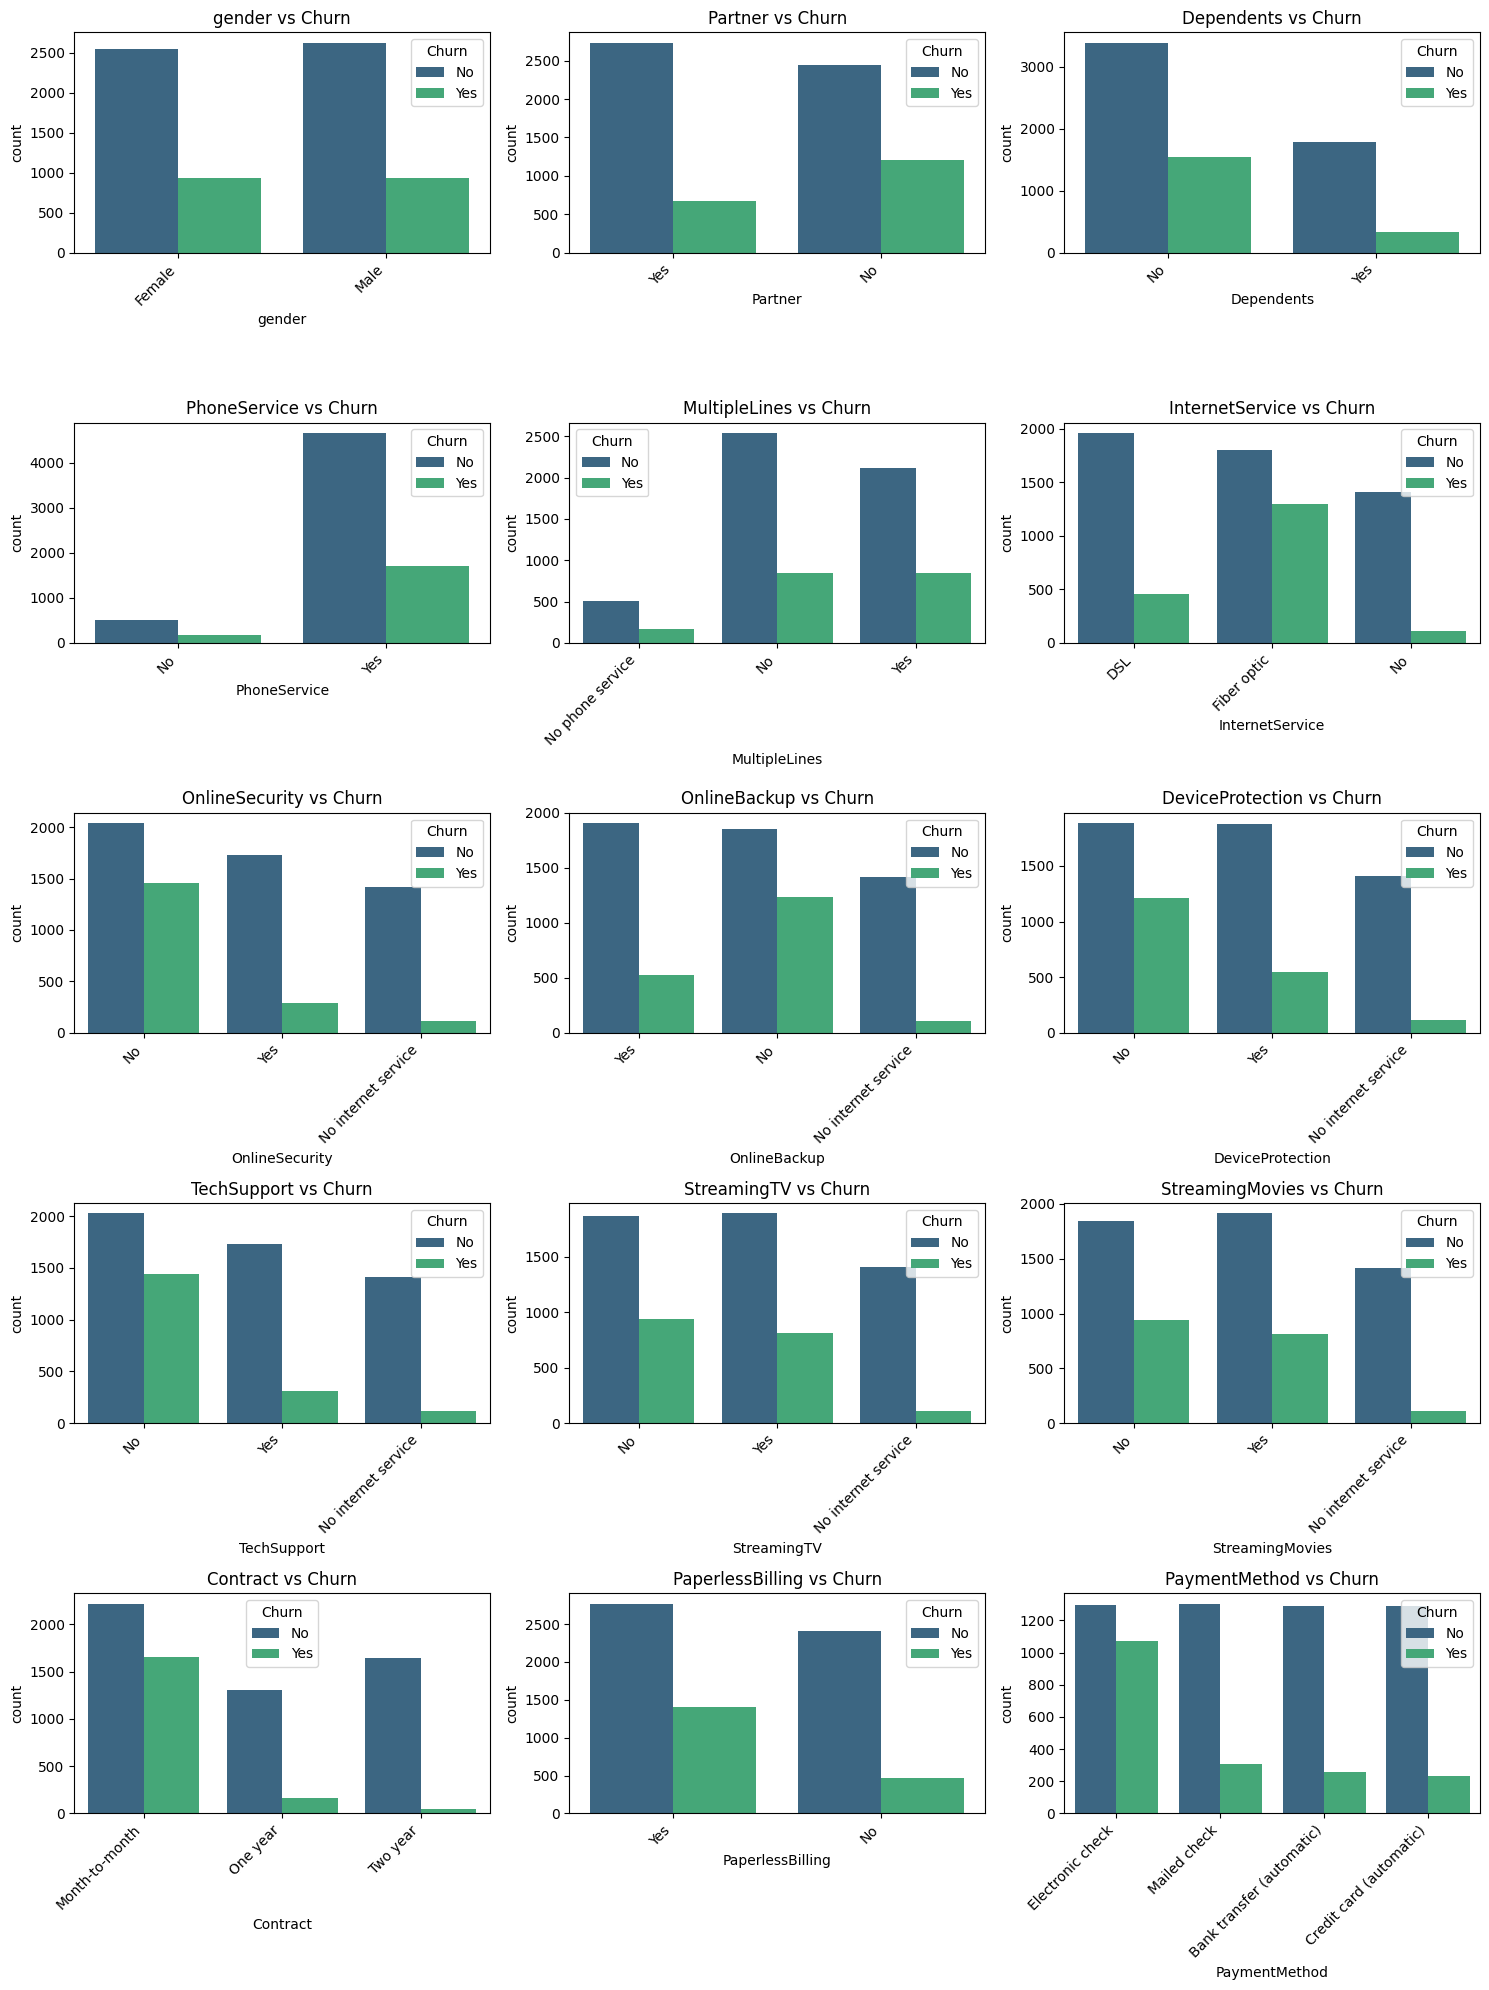

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'customerID' and 'TotalCharges' from categorical features for this visualization
churn_cat_cols = [col for col in cat_cols if col not in ['customerID', 'TotalCharges']]

# Set up the figure size dynamically based on the number of features
num_plots = len(churn_cat_cols)
num_cols = 3 # Number of columns for subplots
num_rows = (num_plots + num_cols - 1) // num_cols # Calculate required rows

plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(churn_cat_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df, x=col, hue=target, palette='viridis')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

now for this features

Contract

PaymentMethod

InternetService

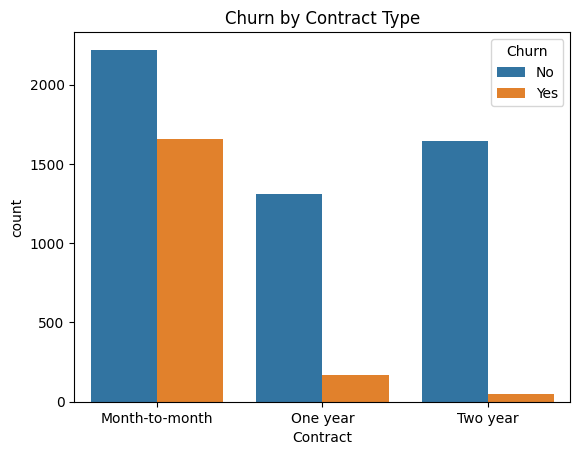

In [10]:
#2️⃣ Target vs Categorical Features (Churn Drivers)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()


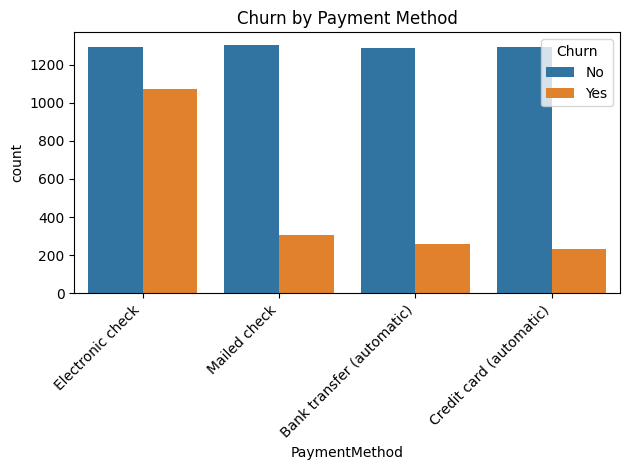

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Churn by Payment Method") # Corrected title
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout() # Adjust layout
plt.show()

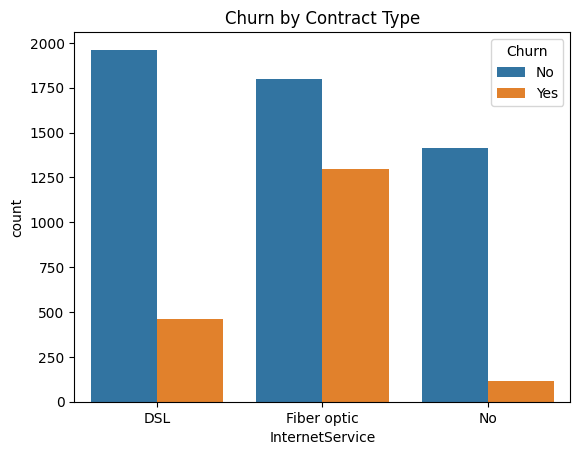

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()


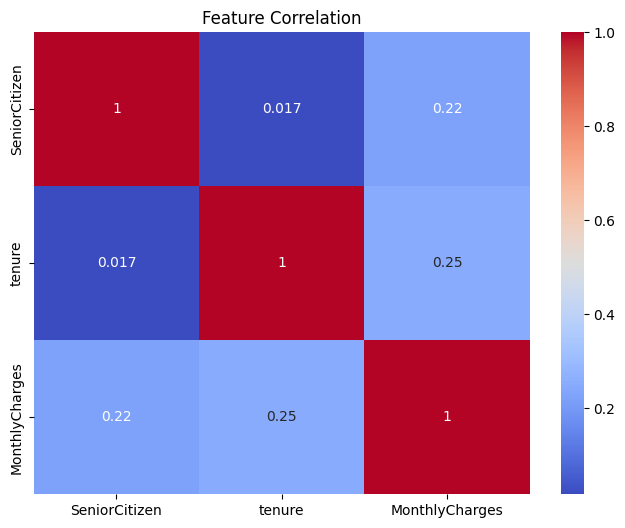

In [13]:
# Re-execute the cell that defines num_cols as a list of numerical features.
# This is assumed to be cell Lo_HOAForewP from previous steps.
# For now, let's explicitly redefine it here to ensure correctness.

# Numerical features
num_cols = df.select_dtypes(exclude=["object"]).columns.tolist()

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [14]:
#Check TotalCharges carefully
df["TotalCharges"].isnull().sum()


0

In [15]:
# If it’s stored as string:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [16]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Interview**
I always check data types manually; many datasets have numeric columns stored as strings.

**EDA Summary**

Customers on month-to-month contracts churn significantly more

Higher monthly charges correlate with higher churn

Longer tenure customers are less likely to churn

TotalCharges required data type correction

Both categorical and numerical features require preprocessing

**STEP 3**
Feature Engineering + Baseline ML Models

In [17]:
#Convert Churn to binary.
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [18]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
#“I used median imputation because it’s robust to outliers.”
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

X = df.drop(["Churn", "customerID"], axis=1) # Exclude 'customerID' from features
y = df["Churn"]

cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

# Create a pipeline for numerical features: impute then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_cols), # Use the numerical pipeline
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)
#Train–Test Split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)


rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        class_weight='balanced' # Added to handle class imbalance
    ))
])

rf.fit(X_train, y_train)

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

evaluate(log_reg, X_test, y_test)
evaluate(rf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC: 0.8420160686145342
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.73      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409

ROC-AUC: 0.8412333049161694


In [21]:
feature_names_after_preprocessor = rf.named_steps["preprocessor"].get_feature_names_out()

importances = rf.named_steps["model"].feature_importances_

# Now, feature_names_after_preprocessor and importances should have matching lengths
feat_imp = pd.Series(importances, index=feature_names_after_preprocessor).sort_values(ascending=False)
feat_imp.head(10)

num__tenure                            0.174647
num__TotalCharges                      0.143211
num__MonthlyCharges                    0.103936
cat__Contract_Two year                 0.100289
cat__InternetService_Fiber optic       0.066101
cat__PaymentMethod_Electronic check    0.049497
cat__Contract_One year                 0.041860
cat__OnlineSecurity_Yes                0.035060
cat__TechSupport_Yes                   0.025069
cat__PaperlessBilling_Yes              0.019449
dtype: float64

In [22]:
import joblib
joblib.dump(rf, "churn_model.pkl")


['churn_model.pkl']